In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re
import kagglehub
import os

path = kagglehub.dataset_download("ruchi798/student-feedback-survey-responses")

# Find the CSV file within the downloaded directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    csv_file_path = os.path.join(path, csv_files[0])
    # Load the dataset
    df = pd.read_csv(csv_file_path)

    # Display the first few rows of the data
    print(df.head())
else:
    print("No CSV files found in the downloaded directory.")

   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                

In [5]:
# Rename columns for easier handling
df.columns = [
    'unnamed_id', 'student_id', 'subject_knowledge', 'clarity_of_explanation',
    'presentation_usage', 'assignment_difficulty', 'doubt_solving',
    'course_structure', 'extra_support', 'course_relevance_recommendation'
]

# Drop unnecessary columns
df = df.drop(['unnamed_id', 'student_id'], axis=1)

# Display data info and the first few rows of the cleaned data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   subject_knowledge                1001 non-null   int64
 1   clarity_of_explanation           1001 non-null   int64
 2   presentation_usage               1001 non-null   int64
 3   assignment_difficulty            1001 non-null   int64
 4   doubt_solving                    1001 non-null   int64
 5   course_structure                 1001 non-null   int64
 6   extra_support                    1001 non-null   int64
 7   course_relevance_recommendation  1001 non-null   int64
dtypes: int64(8)
memory usage: 62.7 KB
None
   subject_knowledge  clarity_of_explanation  presentation_usage  \
0                  5                       2                   7   
1                  6                       5                   8   
2                  7                       7  

/tmp/ipython-input-6-2911985992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='subject_knowledge', data=df, palette='viridis')
/tmp/ipython-input-6-2911985992.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='clarity_of_explanation', data=df, palette='viridis')
/tmp/ipython-input-6-2911985992.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x='presentation_usage', data=df, palette='viridis')
/tmp/ipython-input-6-2911985992.py:14: FutureWarning: 

Passing `palette` without as

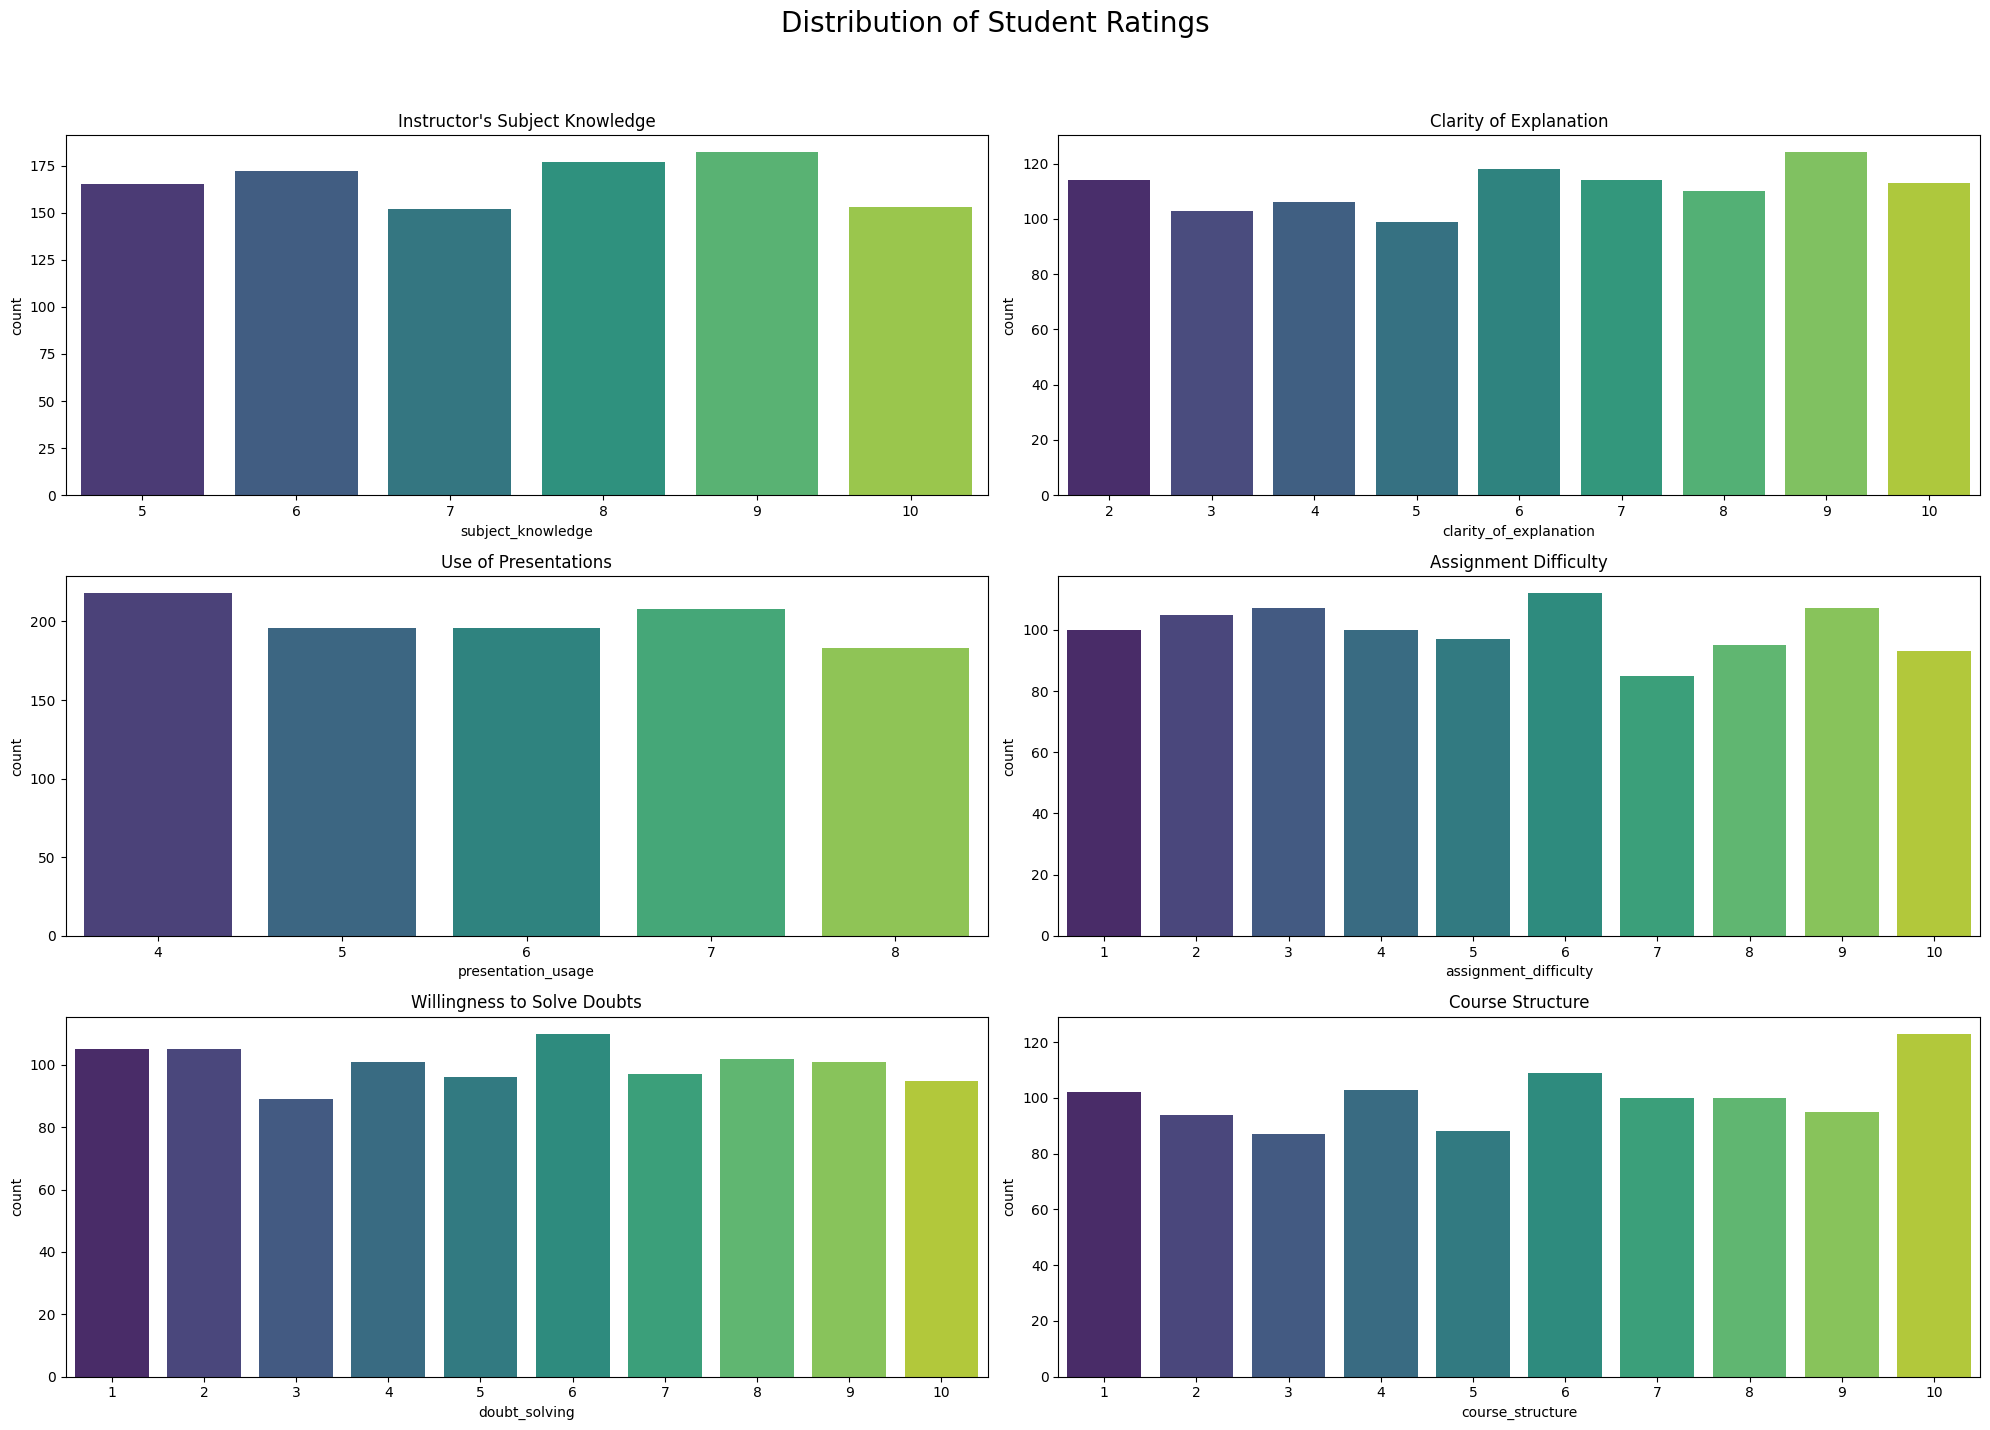

In [6]:
# Create plots for the rating distributions
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Distribution of Student Ratings', fontsize=20)

sns.countplot(ax=axes[0, 0], x='subject_knowledge', data=df, palette='viridis')
axes[0, 0].set_title('Instructor\'s Subject Knowledge')

sns.countplot(ax=axes[0, 1], x='clarity_of_explanation', data=df, palette='viridis')
axes[0, 1].set_title('Clarity of Explanation')

sns.countplot(ax=axes[1, 0], x='presentation_usage', data=df, palette='viridis')
axes[1, 0].set_title('Use of Presentations')

sns.countplot(ax=axes[1, 1], x='assignment_difficulty', data=df, palette='viridis')
axes[1, 1].set_title('Assignment Difficulty')

sns.countplot(ax=axes[2, 0], x='doubt_solving', data=df, palette='viridis')
axes[2, 0].set_title('Willingness to Solve Doubts')

sns.countplot(ax=axes[2, 1], x='course_structure', data=df, palette='viridis')
axes[2, 1].set_title('Course Structure')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('rating_distributions.png')

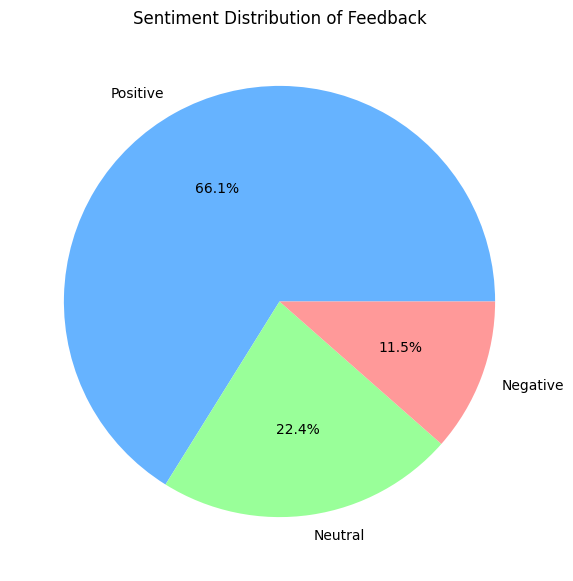

In [7]:
# Function to convert ratings to text feedback
def to_feedback_text(row):
    feedback = []
    if row['subject_knowledge'] > 7:
        feedback.append("excellent subject knowledge")
    if row['clarity_of_explanation'] > 7:
        feedback.append("explains concepts clearly")
    if row['presentation_usage'] > 7:
        feedback.append("good use of presentations")
    if row['assignment_difficulty'] < 4:
        feedback.append("assignments are easy")
    elif row['assignment_difficulty'] > 7:
        feedback.append("assignments are very difficult")
    if row['doubt_solving'] > 7:
        feedback.append("very helpful with doubts")
    if row['course_structure'] > 7:
        feedback.append("course is well structured")
    if not feedback:
        return "neutral feedback"
    return ", ".join(feedback)

df['feedback_text'] = df.apply(to_feedback_text, axis=1)

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['feedback_text'].apply(get_sentiment)

# Plotting sentiment distribution
plt.figure(figsize=(7, 7))
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Sentiment Distribution of Feedback')
plt.savefig('sentiment_distribution.png')

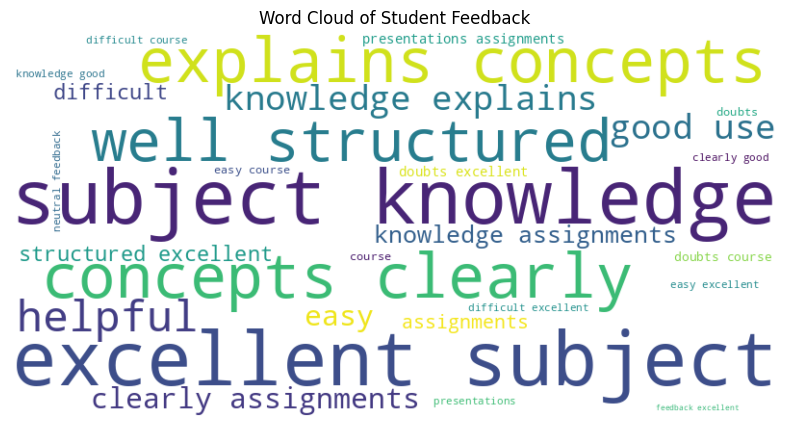

In [8]:
# Generate the word cloud
all_feedback_text = ' '.join(df['feedback_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_feedback_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Student Feedback')
plt.savefig('feedback_wordcloud.png')

# Save the augmented data
df.to_csv('analyzed_student_feedback.csv', index=False)